# Playing with stop words

Nb common words seems to be an interesting feature.
But isn'it disturbed by common words like do, not, and which may precisely be common to many pairs this without any significance ?
So if remove stop words, nb common feature may have more signficance 

In [1]:
# Ugly incantation to make our 'framework' working
import sys
sys.path.insert(0, r'/SAPDevelop/QuoraPairs/BruteForce/Tools')

#import all our small tools (paths, cache, print,zip,excel, pandas, progress,..)
from Tools.all import *

# setup the name of our experiment
# it will be used to store every result in a unique place
EXPERIMENT='remove_stopwords'
# Do a bit of checks before actually running code
UNITARY_TEST = True
print_alert('You will use environment %s' % EXPERIMENT)

## Build our initial features
* Nb words in question 1
* Nb words in question 2
* **abs(Nb words in question 1 - Nb words in question 2)** suppressed
* Nb common words
* Nb common words/nb words in question 1
* Nb common words/nb words in question 2
* Nb non common words in question 1
* Nb non common words in question 2
* Nb common words/(Nb words in question1 + Nb words in question2)

**Notes**
* Input data is not processed except for basic unicode clean
* Heavy to generate so result is cached
* This may be overkill as features will be eliminated but features are also generated for challenge data

In [2]:
def add_column_from_columns(dataframe,output_column_name,function):
    dataframe[output_column_name]=dataframe.progress_apply(function,axis=1)
    return dataframe[output_column_name]

def add_column_from_column(dataframe,output_column_name,input_column_name,function):
    dataframe[output_column_name]=dataframe[input_column_name].progress_apply(function)
    return dataframe[output_column_name]

def build_all_simple_features(dataframe):
    print_warning('Compute common_words between question1 & question2')
    add_column_from_column(dataframe,'nb_words_question1','question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'nb_words_question2','question2',lambda x: len(x.split()))

    #print_warning('Compute abs(Nb words in question 1 - Nb words in question 2)')
    #add_column_from_columns(dataframe,'abs(nb1-nb2)',lambda r: abs(r.nb_words_question1-r.nb_words_question2))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'common_words',lambda r: list(set(r.question1.split())&set(r.question2.split())))
    add_column_from_column(dataframe,'nb_common_words','common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'nb_common_words/nb_words_question1',lambda r: r.nb_common_words/max(1,r.nb_words_question1))
    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'nb_common_words/nb_words_question2',lambda r: r.nb_common_words/max(1,r.nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'nb_words_question1-common_words',lambda r: len(list(set(r.question1.split())-set(r.common_words))))
    add_column_from_columns(dataframe,'nb_words_question2-common_words',lambda r: len(list(set(r.question2.split())-set(r.common_words))))
    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'nb_common_words/(nb_words_question1+nb_words_question2)',lambda r: r.nb_common_words/(r.nb_words_question1+r.nb_words_question2))
    dataframe=dataframe.drop(columns='common_words')
    return dataframe

In [3]:
prepare_environnement(EXPERIMENT)
train_dataframe=load_dataframe(CLEAN_TRAINING_DATA)
challenge_dataframe=load_dataframe(CLEAN_CHALLENGE_DATA)
print_section('Untouched input data has been loaded. Training: %d lines Challenge: %d lines' % (len(train_dataframe),len(challenge_dataframe)))

train_dataframe=load_or_build_dataframe('Training data + basic features','training_basic_features',build_all_simple_features,train_dataframe)
challenge_dataframe=load_or_build_dataframe('Challenge data + basic features','challenge_basic_features',build_all_simple_features,challenge_dataframe)

## We fix a mistake we did early : put everything in lower case !
So, we build a fresh new input data with basic features from scratch

In [4]:
def build_lower_all_simple_features(dataframe):
    print_info('lower case everything')
    dataframe['lower_question1'] = dataframe['question1'].str.lower()
    dataframe['lower_question2'] = dataframe['question2'].str.lower()
    print_warning('Compute common_words between question1 & question2')
    # Useless but More clear
    dataframe['lower_nb_words_question1'] = dataframe['nb_words_question1'].copy()
    dataframe['lower_nb_words_question2'] = dataframe['nb_words_question2'].copy()

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'lower_common_words',lambda r: list(set(r.lower_question1.split())&set(r.lower_question2.split())))
    add_column_from_column(dataframe,'lower_nb_common_words','lower_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'lower_nb_common_words/lower_nb_words_question1',lambda r: r.lower_nb_common_words/max(1,r.lower_nb_words_question1))
    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'lower_nb_common_words/lower_nb_words_question2',lambda r: r.lower_nb_common_words/max(1,r.lower_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'lower_nb_words_question1-common_words',lambda r: len(list(set(r.lower_question1.split())-set(r.lower_common_words))))
    add_column_from_columns(dataframe,'lower_nb_words_question2-common_words',lambda r: len(list(set(r.lower_question2.split())-set(r.lower_common_words))))
    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(dataframe,'lower_nb_common_words/(lower_nb_words_question1+lower_nb_words_question2)',lambda r: r.lower_nb_common_words/max(1,(r.lower_nb_words_question1+r.lower_nb_words_question2)))
    dataframe=dataframe.drop(columns='lower_common_words')
    return dataframe

lower_train_dataframe = load_or_build_dataframe('Training data in lower case + basic features','training_lower_basic_features',build_lower_all_simple_features,train_dataframe)

lower_challenge_dataframe = load_or_build_dataframe('CHallenge data in lower case + basic features','challenge_lower_basic_features',build_lower_all_simple_features,challenge_dataframe)

### Did it change something ?


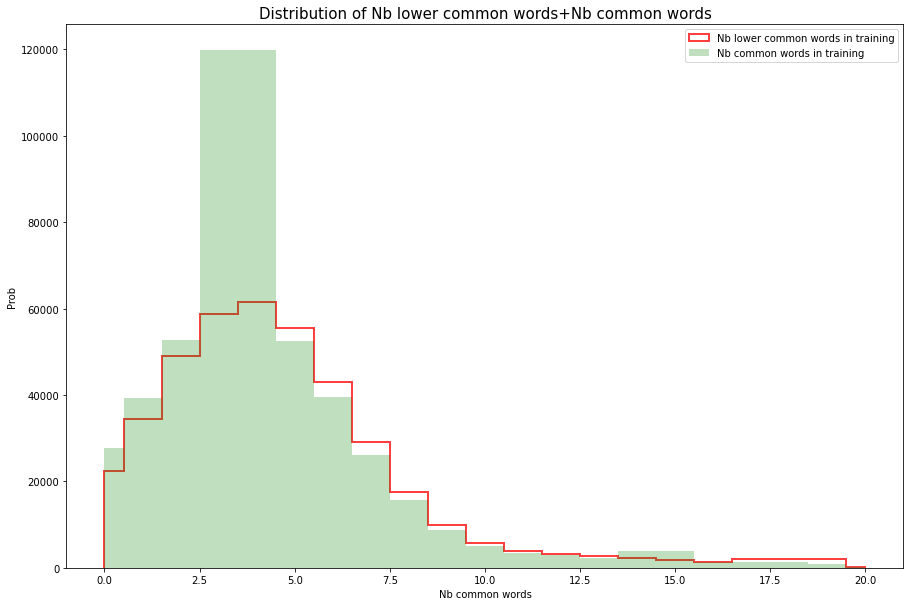

In [5]:
from astropy.visualization import hist as as_hist

nb_changed = int(numpy.where(lower_train_dataframe['lower_nb_common_words']!=lower_train_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of field "nb_common_words" !!' % (nb_changed*100./len(lower_train_dataframe)))

from astropy.visualization import hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(lower_train_dataframe['lower_nb_common_words'],bins="blocks",range=[0,20],density=False,color='r',label="Nb lower common words in training",alpha=0.75,histtype='step',lw=2)
as_hist(lower_train_dataframe['nb_common_words'],bins="blocks",range=[0,20],density=False,color='g',label="Nb common words in training",alpha=0.25,histtype='bar',lw=2)
plot.title('Distribution of Nb lower common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

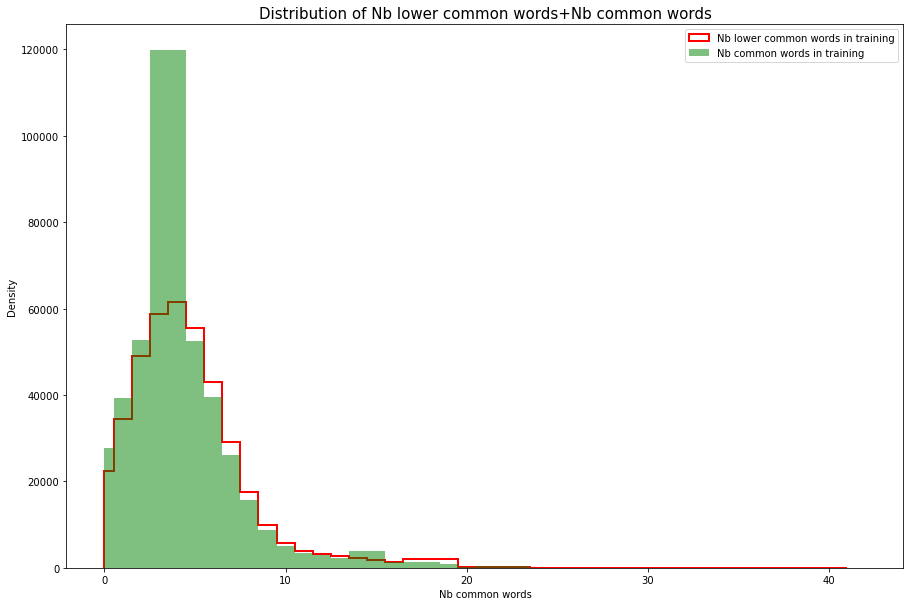

In [6]:


#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(lower_train_dataframe['lower_nb_common_words'],label="Nb lower common words in training",histtype='step',bins='blocks',density=False,color="r",lw=2)
as_hist(lower_train_dataframe['nb_common_words'],label="Nb common words in training",histtype='bar',alpha=0.5,lw=5,bins='blocks',density=False,color="g")
plot.title('Distribution of Nb lower common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Density')
plot.legend()




## Remove a first set of stopwords
### We start with nltk stopwords

In [7]:
from nltk.corpus import stopwords

def remove_stop_words(dataframe):
    print_warning('Remove stopwords from question 1 & question2')
    add_column_from_column(dataframe,'no_stopword_question1','lower_question1',lambda q: ' '.join([word for word in q.split() if word not in nltk_stopwords]))
    add_column_from_column(dataframe,'no_stopword_question2','lower_question2',lambda q: ' '.join([word for word in q.split() if word not in nltk_stopwords]))
    
    add_column_from_column(dataframe,'no_stopword_nb_words_question1','no_stopword_question1',lambda x: len(x.split()))
    add_column_from_column(dataframe,'no_stopword_nb_words_question2','no_stopword_question2',lambda x: len(x.split()))

    print_warning('Compute Nb common_words between question1 & question2')
    add_column_from_columns(dataframe,'no_stopword_common_words',lambda r: list(set(r.no_stopword_question1.split())&set(r.no_stopword_question2.split())))
    add_column_from_column(dataframe,'no_stopword_nb_common_words','no_stopword_common_words',len)

    print_warning('Compute Nb common words/nb words in question1')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/no_stopword_nb_words_question1',lambda r: r.no_stopword_nb_common_words/max(1,r.no_stopword_nb_words_question1))

    print_warning('Compute Nb common words/nb words in question2')
    add_column_from_columns(dataframe,'no_stopword_nb_common_words/no_stopword_nb_words_question2',lambda r: r.no_stopword_nb_common_words/max(1,r.no_stopword_nb_words_question2))

    print_warning('Compute Nb words in question1,question2 not in common words')
    add_column_from_columns(dataframe,'no_stopword_nb_words_question1-no_stopword_common_words',lambda r: len(list(set(r.no_stopword_question1.split())-set(r.no_stopword_common_words))))
    add_column_from_columns(dataframe,'no_stopword_nb_words_question2-no_stopword_common_words',lambda r: len(list(set(r.no_stopword_question2.split())-set(r.no_stopword_common_words))))

    print_warning('Compute (nb common words)/(nb words in question1+nb word in question2)')
    add_column_from_columns(
        dataframe,
        'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)',
        lambda r: r.no_stopword_nb_common_words/max(1,(r.no_stopword_nb_words_question1+r.no_stopword_nb_words_question2)))
    dataframe=dataframe.drop(columns='no_stopword_common_words')
    return dataframe

nltk_stopwords = set(stopwords.words('english'))
print_info( 'There is %d stopwords in nltk' % len(nltk_stopwords))

stopwords_train_dataframe = load_or_build_dataframe('Removing stopwords','training_basic_feature_no_stopwords',remove_stop_words,lower_train_dataframe)
stopwords_challenge_dataframe = load_or_build_dataframe('Removing stopwords','challenge_basic_feature_no_stopwords',remove_stop_words,lower_challenge_dataframe)

nb_changed_train = int(numpy.where(stopwords_train_dataframe['no_stopword_nb_common_words']!=train_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of nb common_words in training!!' % (nb_changed_train*100./len(train_dataframe)))
nb_changed_challenge = int(numpy.where(stopwords_challenge_dataframe['no_stopword_nb_common_words']!=challenge_dataframe['nb_common_words'],1,0).sum())
print_info('We have changed %.2f %% of nb common_words in challenge !!' % (nb_changed_challenge*100./len(challenge_dataframe)))



In [8]:
display(train_dataframe.head(1))
display(lower_train_dataframe.head(1))
display(stopwords_train_dataframe.head(1))

id  qid1  qid2                                                           question1                                                  question2  is_duplicate  nb_words_question1  \
0   0     1     2  What is the step by step guide to invest in share market in india?  What is the step by step guide to invest in share market?             0                  14   

   nb_words_question2  nb_common_words  nb_common_words/nb_words_question1  nb_common_words/nb_words_question2  nb_words_question1-common_words  nb_words_question2-common_words  \
0                  12               10                            0.714286                            0.833333                                2                                1   

   nb_common_words/(nb_words_question1+nb_words_question2)  
0                                                 0.384615

id  qid1  qid2                                                           question1                                                  question2  is_duplicate  nb_words_question1  \
0   0     1     2  What is the step by step guide to invest in share market in india?  What is the step by step guide to invest in share market?             0                  14   

   nb_words_question2  nb_common_words  nb_common_words/nb_words_question1  ...                                                     lower_question1  \
0                  12               10                            0.714286  ...  what is the step by step guide to invest in share market in india?   

                                             lower_question2  lower_nb_words_question1  lower_nb_words_question2 lower_nb_common_words lower_nb_common_words/lower_nb_words_question1  \
0  what is the step by step guide to invest in share market?                        14                        12                    10                                       0.714286   

   lower_nb_common_words/lower_nb_words_question2  lower_nb_words_question1-common_words  lower_nb_words_question2-common_words  \
0                                        0.833333                                      2                                      1   

   lower_nb_common_words/(lower_nb_words_question1+lower_nb_words_question2)  
0                                                                   0.384615  

[1 rows x 24 columns]

id  qid1  qid2                                                           question1                                                  question2  is_duplicate  nb_words_question1  \
0   0     1     2  What is the step by step guide to invest in share market in india?  What is the step by step guide to invest in share market?             0                  14   

   nb_words_question2  nb_common_words  nb_common_words/nb_words_question1  ...                       no_stopword_question1                 no_stopword_question2  no_stopword_nb_words_question1  \
0                  12               10                            0.714286  ...  step step guide invest share market india?  step step guide invest share market?                               7   

   no_stopword_nb_words_question2 no_stopword_nb_common_words no_stopword_nb_common_words/no_stopword_nb_words_question1  no_stopword_nb_common_words/no_stopword_nb_words_question2  \
0                               6                           4                                                   0.571429                                                    0.666667   

   no_stopword_nb_words_question1-no_stopword_common_words  no_stopword_nb_words_question2-no_stopword_common_words  \
0                                                        2                                                        1   

   no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)  
0                                                                                     0.307692  

[1 rows x 34 columns]

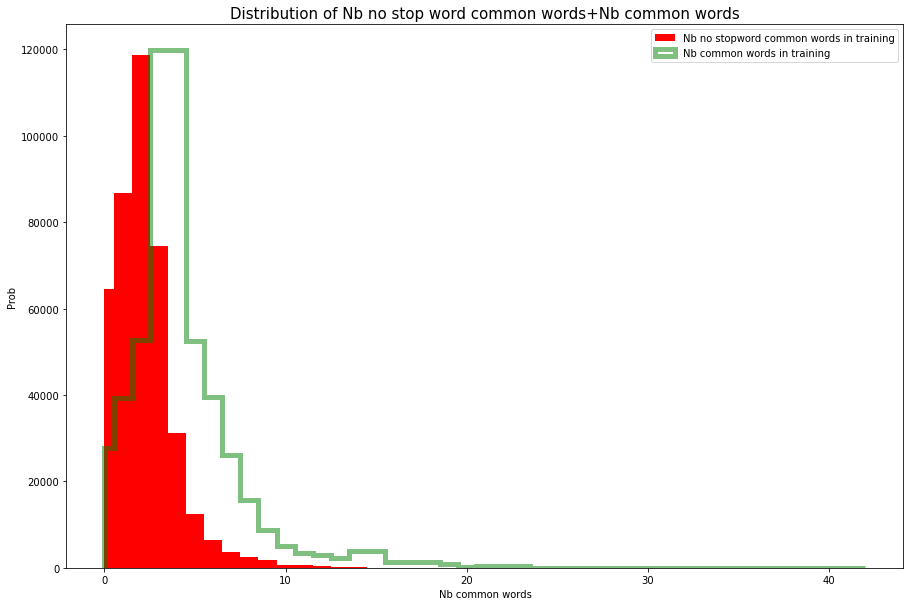

In [9]:
from astropy.visualization import hist as as_hist

#sns.histplot(lower_training_dataframe['lower_nb_common_words'],stat='count',bins=50)
#sns.histplot(lower_training_dataframe['nb_common_words'],color="g",alpha=0.5,bins=50,legend=True)
#sns.histplot(lower_training_dataframe['lower_nb_common_words'],color="r",alpha=0.5,bins=50,legend=True)

plot.figure(figsize=(15, 10))
as_hist(stopwords_train_dataframe['no_stopword_nb_common_words'],label="Nb no stopword common words in training",histtype='stepfilled',bins='blocks',density=False,color="r")
as_hist(train_dataframe['nb_common_words'],label="Nb common words in training",histtype='step',alpha=0.5,lw=5,bins='blocks',density=False,color="g")
plot.title('Distribution of Nb no stop word common words+Nb common words', fontsize=15)
plot.xlabel('Nb common words')
plot.ylabel('Prob')
plot.legend()

## Challenge and training are not equivalent

% of duplicate in training is not the same in challenge !
We don't have the challenge's answer but by scoring a constant prediction and using logloss definition, we can guess the distribution of duplicates in challenge

It's 17.46 %

To fix that we can:

* duplicate some negative cases in training to match challenge distribution
* use weights : each case has a weight !=1 and all algorithms are supposed to be able to deal with that info
I choose to use weights (less memory needed ?)

Suppress some useless data

In [10]:
all_lower_cols = [n for n in stopwords_train_dataframe.columns if 'lower' in n]
stopwords_train_dataframe = stopwords_train_dataframe.drop(columns=all_lower_cols)
assert 'lower_nb_common_words' not in stopwords_train_dataframe.columns
display(stopwords_train_dataframe.head(1))
del train_dataframe
del lower_train_dataframe
stopwords_challenge_dataframe = stopwords_challenge_dataframe.drop(columns=all_lower_cols)
assert 'lower_nb_common_words' not in stopwords_challenge_dataframe.columns
display(stopwords_challenge_dataframe.head(1))
del challenge_dataframe
del lower_challenge_dataframe

id  qid1  qid2                                                           question1                                                  question2  is_duplicate  nb_words_question1  \
0   0     1     2  What is the step by step guide to invest in share market in india?  What is the step by step guide to invest in share market?             0                  14   

   nb_words_question2  nb_common_words  nb_common_words/nb_words_question1  ...                       no_stopword_question1                 no_stopword_question2  no_stopword_nb_words_question1  \
0                  12               10                            0.714286  ...  step step guide invest share market india?  step step guide invest share market?                               7   

   no_stopword_nb_words_question2 no_stopword_nb_common_words no_stopword_nb_common_words/no_stopword_nb_words_question1  no_stopword_nb_common_words/no_stopword_nb_words_question2  \
0                               6                           4                                                   0.571429                                                    0.666667   

   no_stopword_nb_words_question1-no_stopword_common_words  no_stopword_nb_words_question2-no_stopword_common_words  \
0                                                        2                                                        1   

   no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)  
0                                                                                     0.307692  

[1 rows x 24 columns]

test_id                                                  question1                                                             question2  nb_words_question1  nb_words_question2  nb_common_words  \
0        0  How does the Surface Pro himself 4 compare with iPad Pro?  Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?                  11                  14                2   

   nb_common_words/nb_words_question1  nb_common_words/nb_words_question2  nb_words_question1-common_words  nb_words_question2-common_words  ...            no_stopword_question1  \
0                            0.181818                            0.142857                                9                               11  ...  surface pro 4 compare ipad pro?   

                                  no_stopword_question2 no_stopword_nb_words_question1  no_stopword_nb_words_question2  no_stopword_nb_common_words  \
0  microsoft choose core m3 core i3 home surface pro 4?                              6                              10                            2   

   no_stopword_nb_common_words/no_stopword_nb_words_question1  no_stopword_nb_common_words/no_stopword_nb_words_question2  no_stopword_nb_words_question1-no_stopword_common_words  \
0                                                    0.333333                                                         0.2                                                        4   

   no_stopword_nb_words_question2-no_stopword_common_words  no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)  
0                                                        7                                                                                        0.125  

[1 rows x 21 columns]

In [11]:
# return the weight for 0 and weight for 1 needed to rebalance dataframe like challenge
def balanced_weights(dataframe,expected_positive_ratio):
    current_positive_ratio = dataframe['is_duplicate'].sum()/len(dataframe)
    weight_for_negative = (1-expected_positive_ratio)/(1-current_positive_ratio)
    weight_for_positive = expected_positive_ratio/current_positive_ratio
    return weight_for_positive,weight_for_negative
    return 1,


CHALLENGE_DUPLICATE_PERCENT = 0.1746
print_warning('OUPS !! %% of duplicates in train is %.3f. In challenge it is %.3f %%' % (stopwords_train_dataframe['is_duplicate'].sum()/len(stopwords_train_dataframe),CHALLENGE_DUPLICATE_PERCENT))

# create a new 'weight' column to training dataset
# Do not forget to remove this column from features !!!
weight_for_1,weight_for_0 = balanced_weights(stopwords_train_dataframe,CHALLENGE_DUPLICATE_PERCENT)
print_info('Weight for positive case %.3f' % weight_for_1)
print_info('Weight for negative case %.3f' % weight_for_0)
stopwords_train_dataframe['weight'] = stopwords_train_dataframe['is_duplicate'].map( {0:weight_for_0, 1:weight_for_1})

assert int(stopwords_train_dataframe['weight'].sum()/len(stopwords_train_dataframe)) == 1, "training dataset has not been properly rebalanced"
print_info("Training data set has been properly rebalanced")
print_info('Weights distribution:')
stopwords_train_dataframe['weight'].describe()

count    404290.000000
mean          1.000000
std           0.403239
min           0.472917
25%           0.472917
50%           1.308493
75%           1.308493
max           1.308493
Name: weight, dtype: float64

In [12]:
stopwords_train_dataframe.head(2).transpose()

0  \
id                                                                                                                                                            0   
qid1                                                                                                                                                          1   
qid2                                                                                                                                                          2   
question1                                                                                    What is the step by step guide to invest in share market in india?   
question2                                                                                             What is the step by step guide to invest in share market?   
is_duplicate                                                                                                                                                  0   
nb_words_question1                                                                                                                                           14   
nb_words_question2                                                                                                                                           12   
nb_common_words                                                                                                                                              10   
nb_common_words/nb_words_question1                                                                                                                     0.714286   
nb_common_words/nb_words_question2                                                                                                                     0.833333   
nb_words_question1-common_words                                                                                                                               2   
nb_words_question2-common_words                                                                                                                               1   
nb_common_words/(nb_words_question1+nb_words_question2)                                                                                                0.384615   
no_stopword_question1                                                                                                step step guide invest share market india?   
no_stopword_question2                                                                                                      step step guide invest share market?   
no_stopword_nb_words_question1                                                                                                                                7   
no_stopword_nb_words_question2                                                                                                                                6   
no_stopword_nb_common_words                                                                                                                                   4   
no_stopword_nb_common_words/no_stopword_nb_words_question1                                                                                             0.571429   
no_stopword_nb_common_words/no_stopword_nb_words_question2                                                                                             0.666667   
no_stopword_nb_words_question1-no_stopword_common_words                                                                                                       2   
no_stopword_nb_words_question2-no_stopword_common_words                                                                                                       1   
no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)                                                            0.307692   
weight                                                                             

## Compute AUC of these basic features and try to figure if there is a bit of information inside each one

ie is it helping to separate 1 from 0?

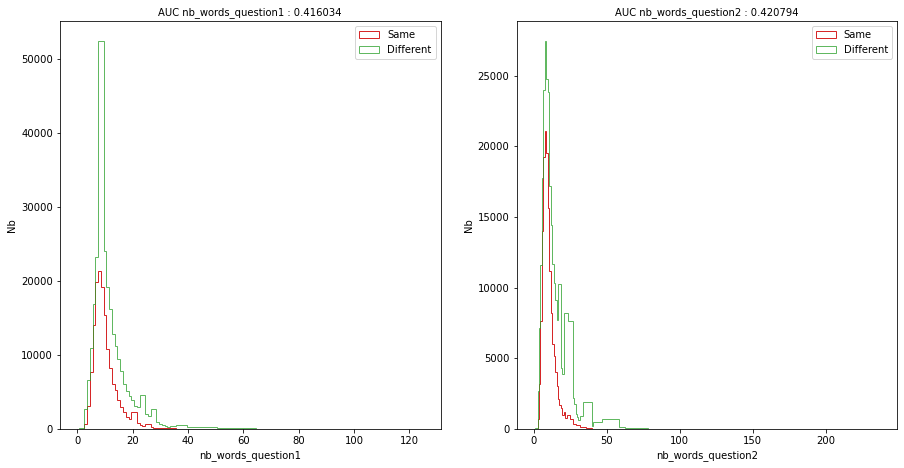

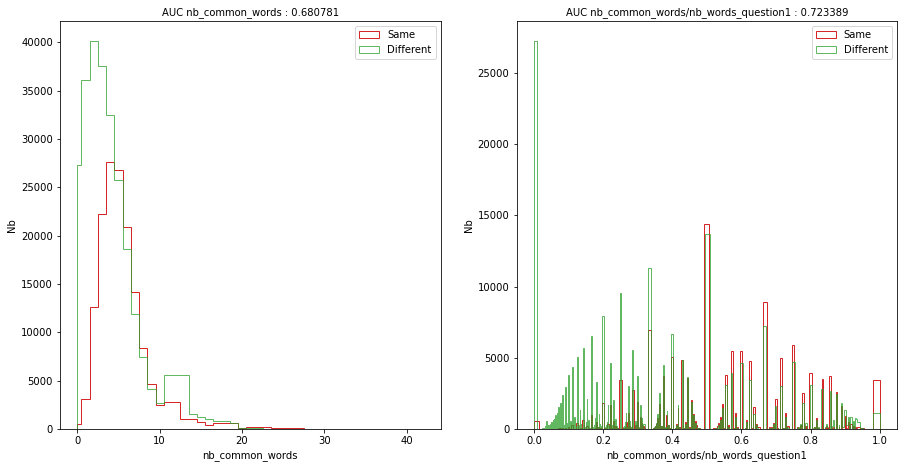

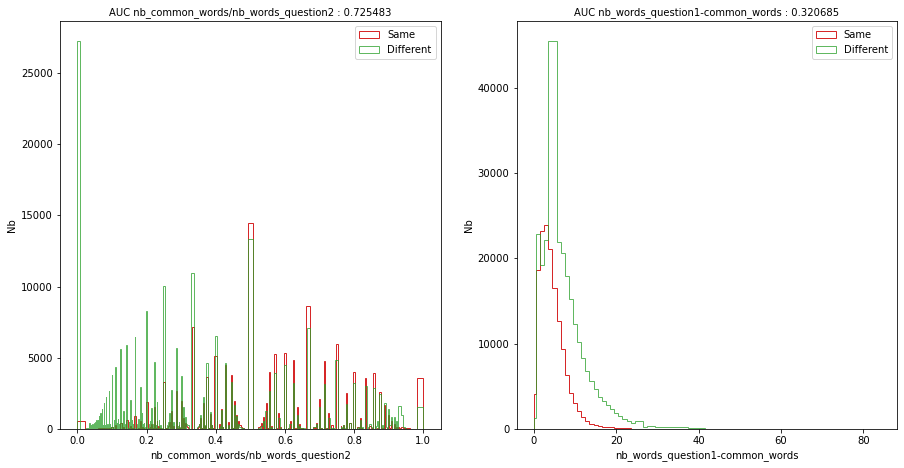

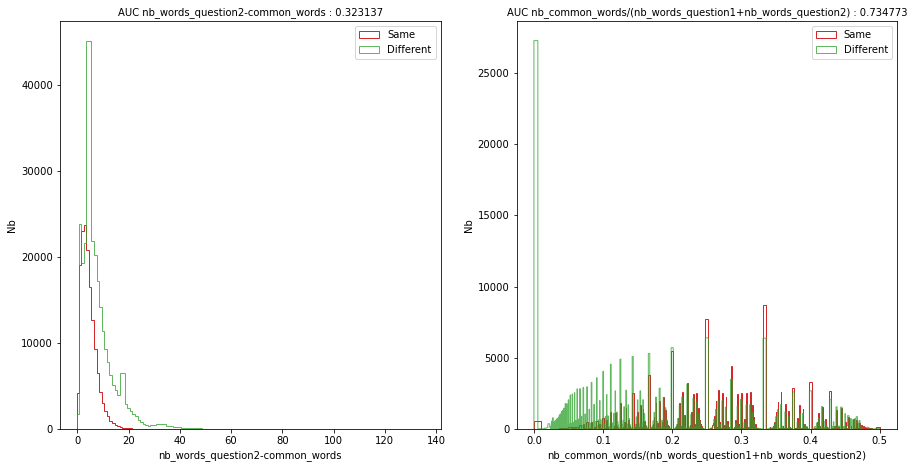

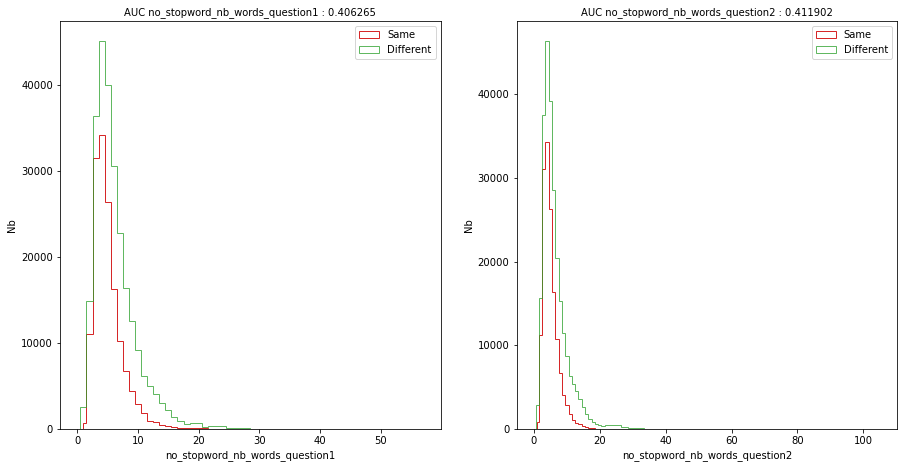

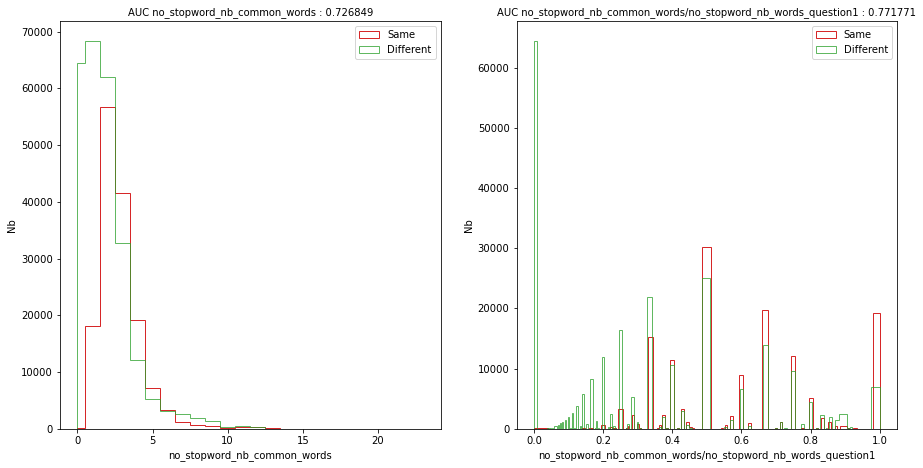

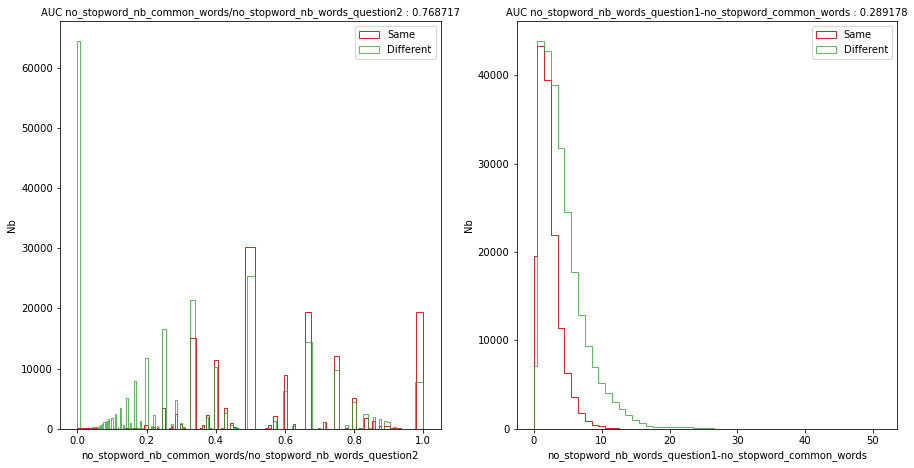

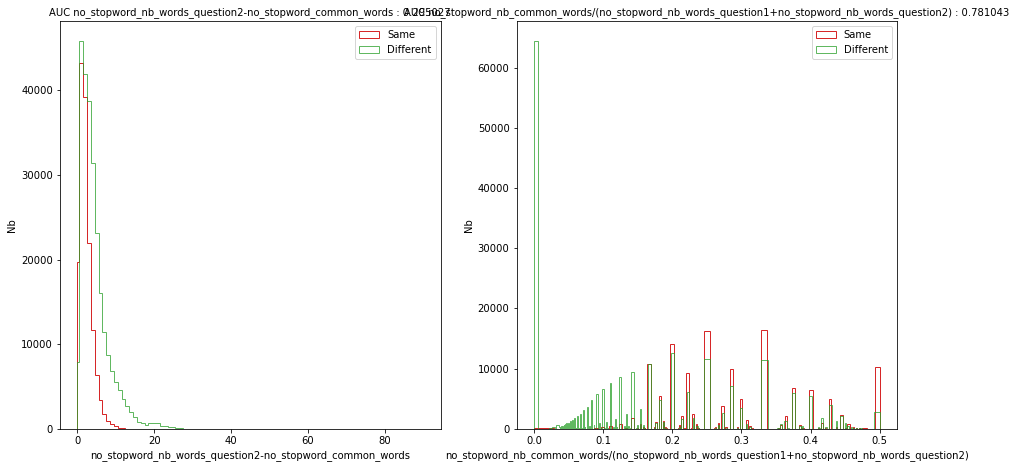

In [13]:
from sklearn.metrics import roc_auc_score

def simple_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name])

def simple_weighted_AUC(dataframe,column_name):
    return roc_auc_score(y_true=dataframe['is_duplicate'],y_score=dataframe[column_name],sample_weight=dataframe['weight'])

def show_AUC(dataframe,column_name):
    if 'weight' in dataframe.columns:
        print_bullet('Weighted AUC %s %f' % (column_name,simple_weighted_AUC(dataframe,column_name)))
    else:
        print_bullet('AUC %s %f' % (column_name,simple_AUC(dataframe,column_name)))
        

def display_simple_AUC(dataframe,column_name):
    palette = sns.color_palette()
    # Let multiplot_generator figure the size
    #plot.figure(figsize=(10, 7))
    #plot.hist(dataframe[column_name][dataframe['is_duplicate']==1],bins=50,color=palette[3],label='Same',histtype='step')
    #plot.hist(dataframe[column_name][dataframe['is_duplicate']==0],bins=50,color=palette[2],label='Different',alpha = 0.75,histtype='step')
    as_hist(dataframe[column_name][dataframe['is_duplicate']==1],bins="blocks",color=palette[3],label='Same',histtype='step')
    as_hist(dataframe[column_name][dataframe['is_duplicate']==0],bins="blocks",color=palette[2],label='Different',alpha = 0.75,histtype='step')
    plot.title('AUC %s : %f' % (column_name,simple_AUC(dataframe,column_name)) , fontsize=10)
    plot.xlabel(column_name)
    plot.ylabel('Nb')
    plot.legend()



def show_all_simple_AUC(dataframe):
    all =  all_numeric_columns(dataframe)
    print_section( 'Show AUC on %d unique features' % len(all))
    for name in all:
        show_AUC(dataframe,name)
        yield
        display_simple_AUC(dataframe,name)
    print_done('Done')


def show_all_simple_AUC_in_grid(dataframe,nb_columns=2):
    multiplot_from_generator(show_all_simple_AUC(dataframe), nb_columns)

show_all_simple_AUC_in_grid(stopwords_train_dataframe,nb_columns=2)

## OK Visualising these AUC is cool
Can we have some numbers ?

is_duplicate                                                                                   1.000000
no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)    0.457270
no_stopword_nb_common_words/no_stopword_nb_words_question1                                     0.446184
no_stopword_nb_common_words/no_stopword_nb_words_question2                                     0.440840
nb_common_words/(nb_words_question1+nb_words_question2)                                        0.370994
nb_common_words/nb_words_question2                                                             0.359681
nb_common_words/nb_words_question1                                                             0.358852
no_stopword_nb_words_question1-no_stopword_common_words                                        0.336392
no_stopword_nb_words_question2-no_stopword_common_words                                        0.321713
nb_words_question1-common_words                                 

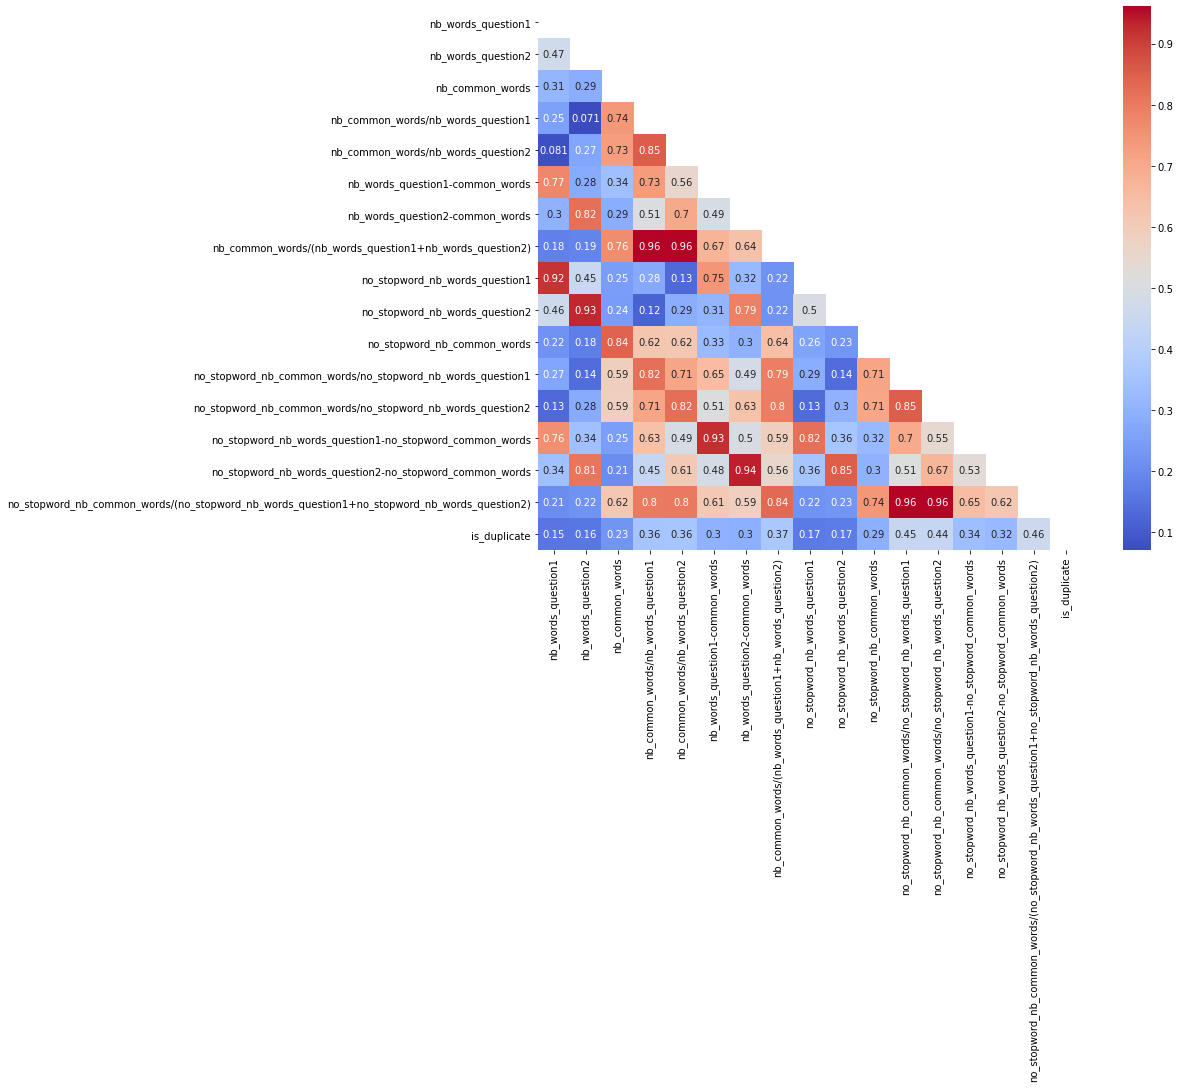

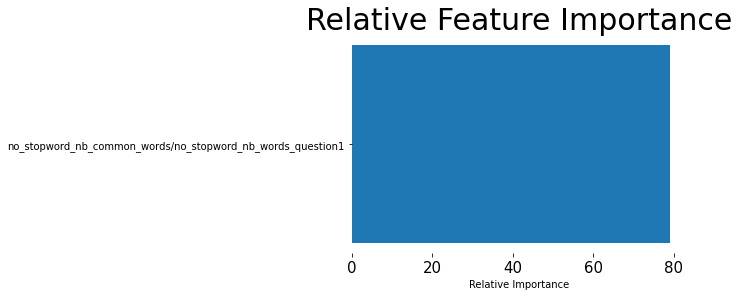

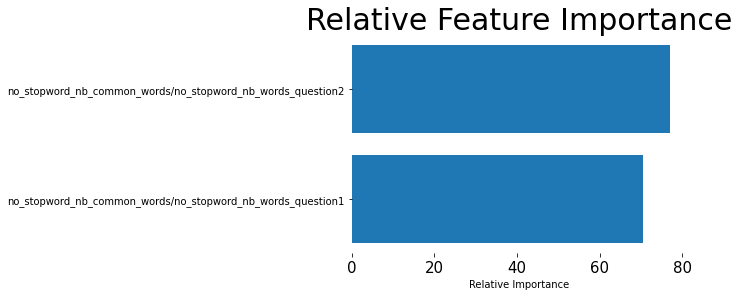

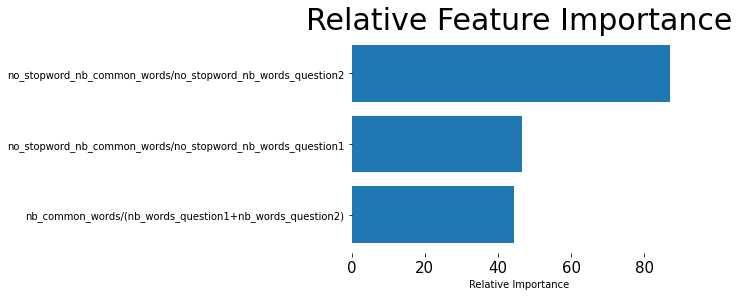

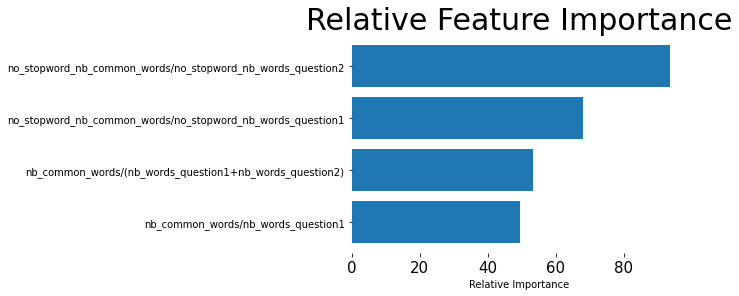

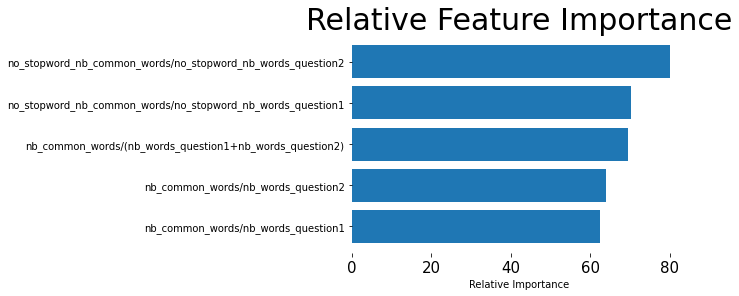

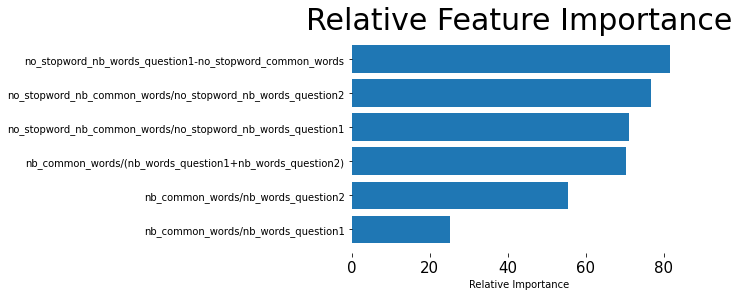

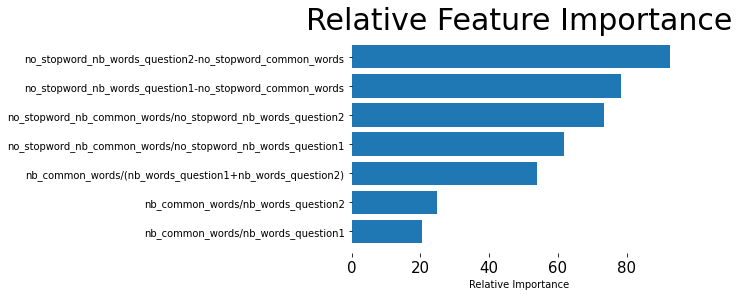

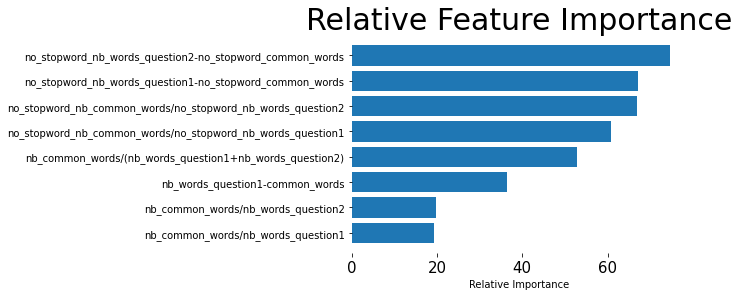

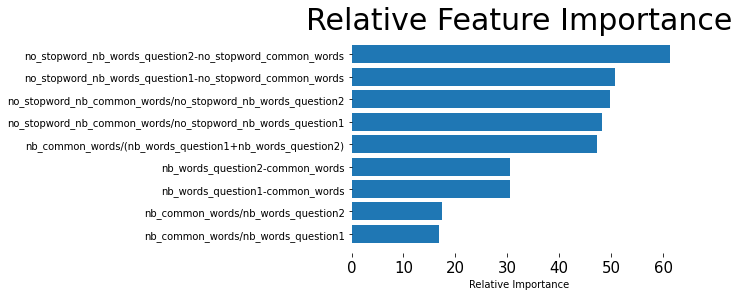

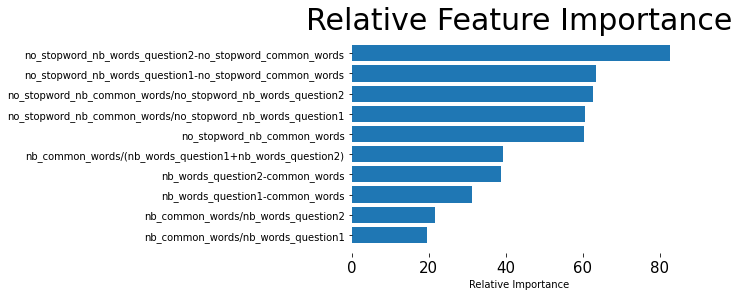

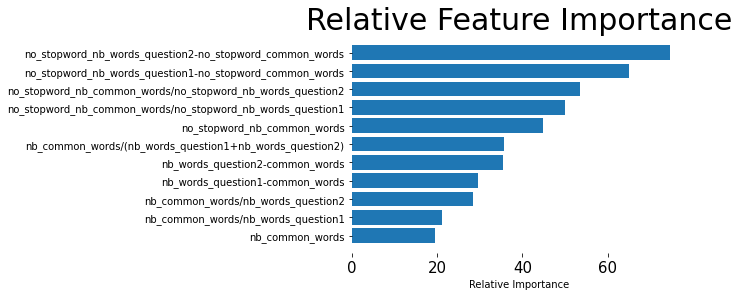

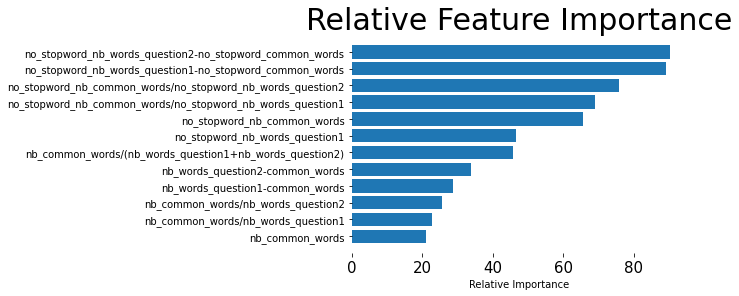

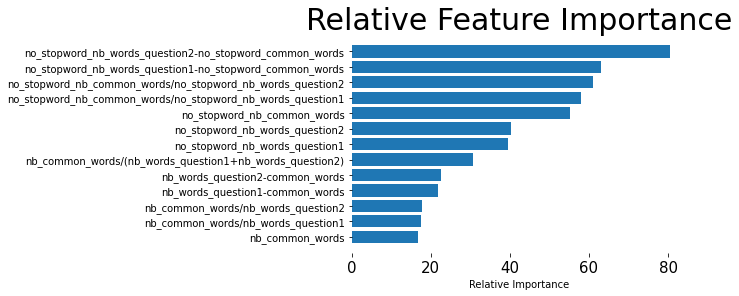

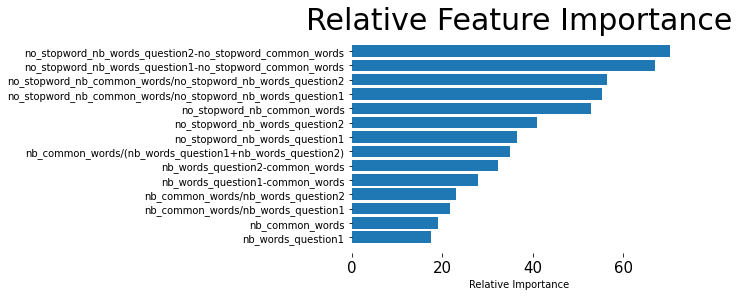

[ 3  4  7 11 12 15]
[0.13495157 0.14301351 0.17603494 0.14607622 0.17550655 0.22441721]


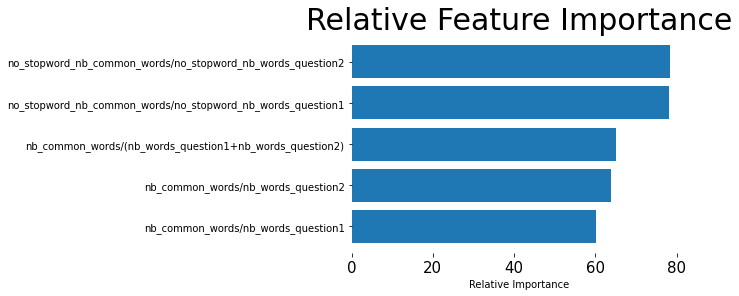

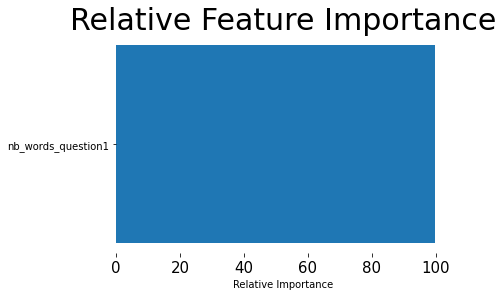

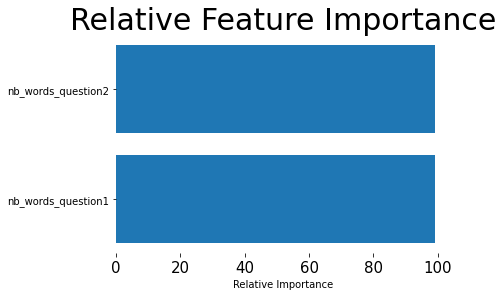

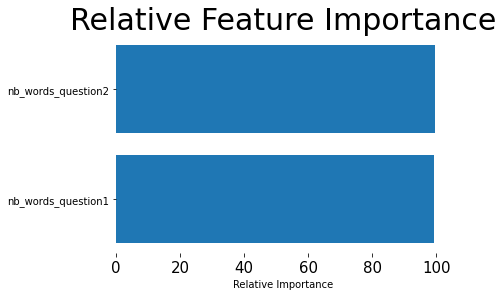

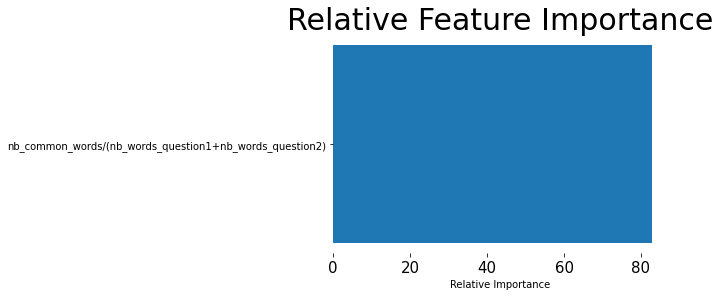

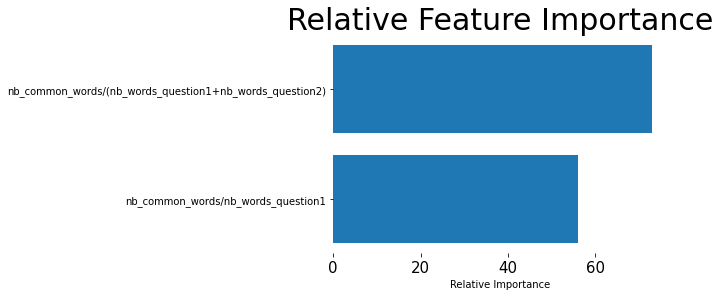

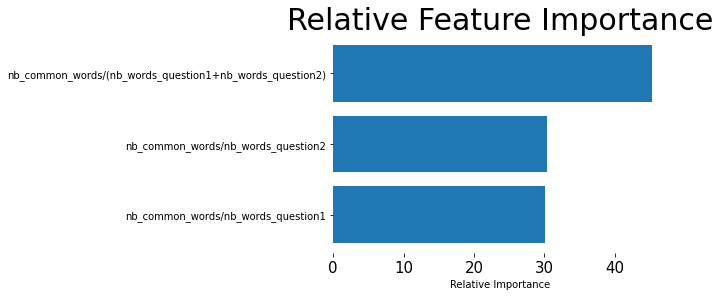

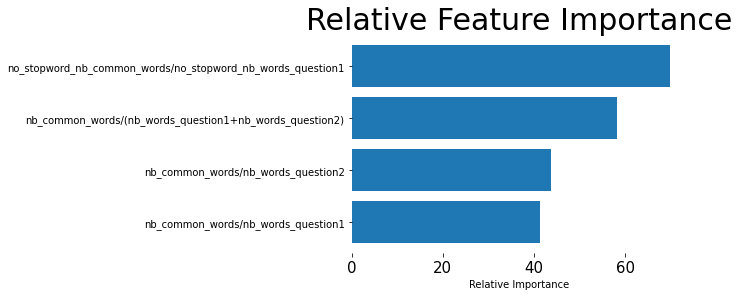

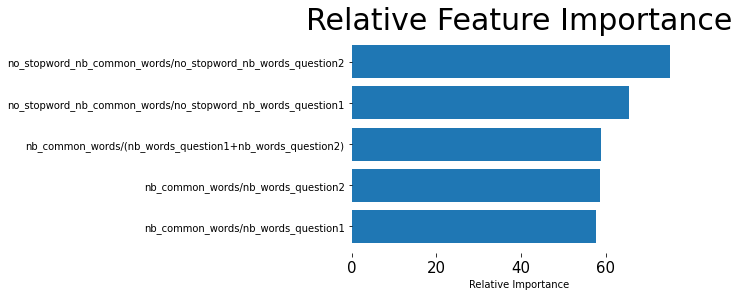

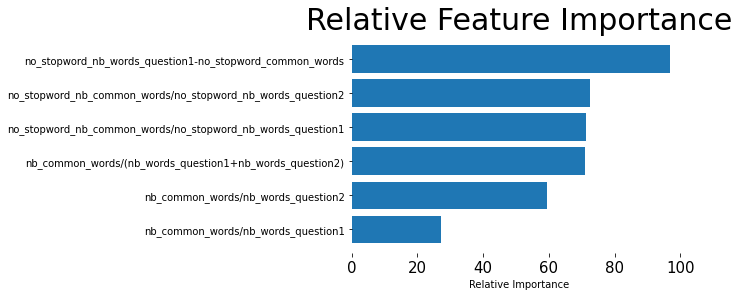

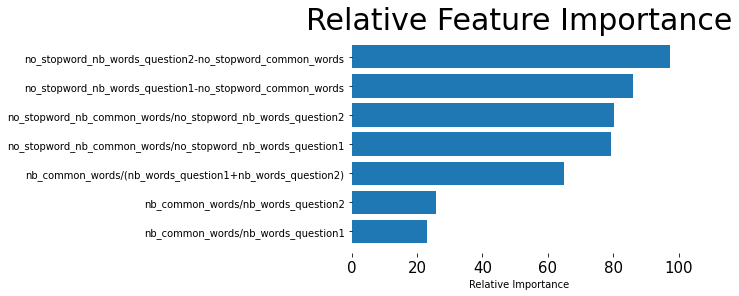

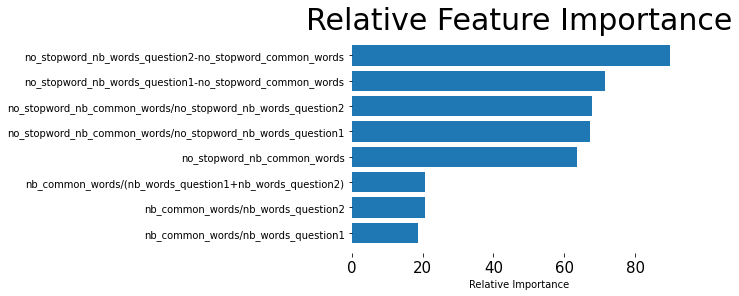

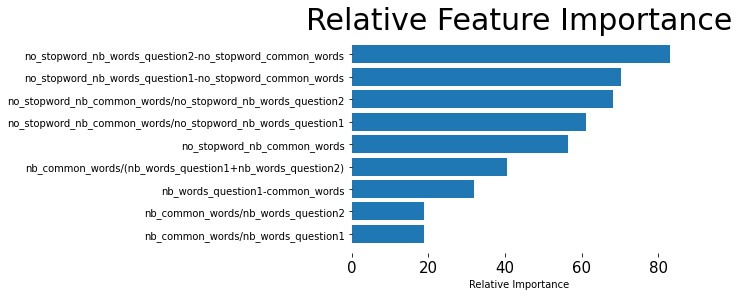

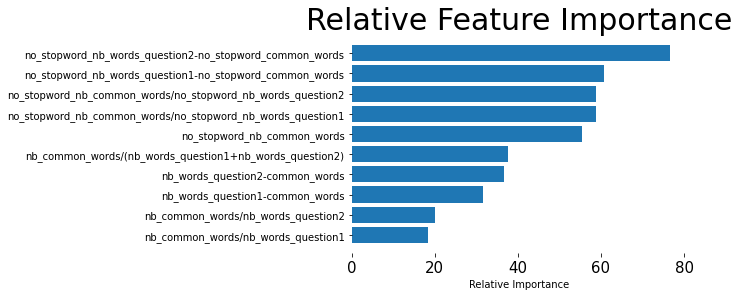

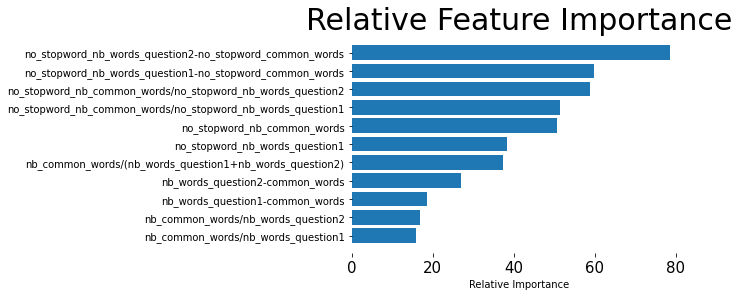

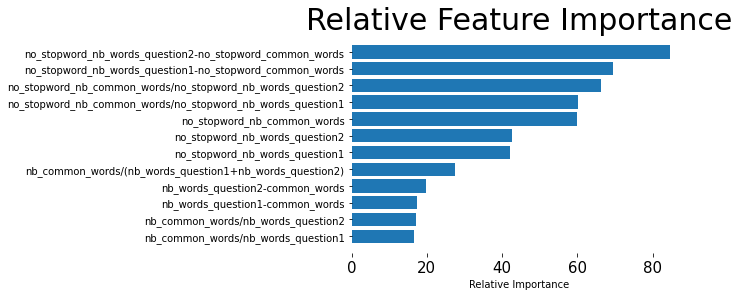

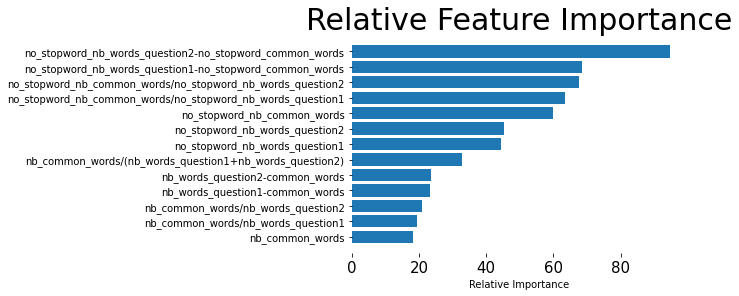

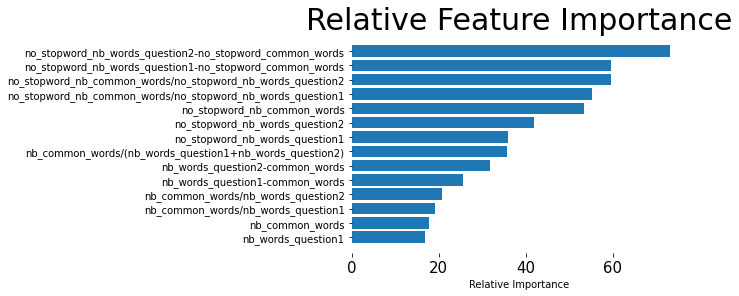

In [14]:

from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest,f_classif,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

def graph_relative_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    features_importances = 100.0 * (features_importances / features_importances.max())
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:-1:1]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Relative Importance')
    plot.title('Relative Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    sns.despine(left=True, bottom=True)
    plot.show()

def graph_feature_importance(features_importances,columns):
    # Make importances relative to max importance.
    sorted_idx = numpy.argsort(features_importances)
    sorted_idx = sorted_idx[-20:]
    pos = numpy.arange(sorted_idx.shape[0]) + 0.5
    plot.barh(pos, features_importances[sorted_idx], align='center')
    plot.yticks(pos, columns)
    plot.xlabel('Importance')
    plot.title('Feature Importance', fontsize=30)
    plot.tick_params(axis='x', which='major', labelsize=15)
    #sns.despine(left=True, bottom=True)
    plot.show()

def independant_features_analysis(name_data,input_df,target_df):
    train_df = input_df[all_numeric_columns(input_df)]
    target_df = target_df
    small = int(len(target_df)*0.05)
    small_train = train_df.sample(small,random_state=42)
    small_target = target_df.sample(small,random_state=42)
    small_weights = input_df[WEIGHT].sample(small,random_state=42)

    # be careful all_numeric will include also the target soon
    all_numeric = all_numeric_columns(input_df)
    print_section('Minimal analysis of numeric features of %s' % name_data)
    print_info('Nb features: %d' % len(all_numeric))
    print_info(str(all_numeric))
    print_info('Is there any null value ? %s' % input_df.isnull().any().any())

    compute_variances = feature_selection.VarianceThreshold()
    all_numeric.append('is_duplicate')
    variances = compute_variances.fit_transform(input_df[all_numeric])
    print_info('Is there any low variance feature ? %s' % str(variances.shape[1]!=len(all_numeric)))
    print_info('Here are the correlations to the target "is_duplicate"')
    correlation_matrix = input_df[all_numeric].corr().abs()
    print(correlation_matrix['is_duplicate'].nlargest(len(all_numeric)))

    correlation_matrix_without_is_duplicate = correlation_matrix['is_duplicate'][correlation_matrix['is_duplicate']<1]
    highest_correlated_feature = correlation_matrix_without_is_duplicate.nlargest(1).index[0]
    highest_correlation = correlation_matrix_without_is_duplicate.nlargest(1)[0]
    if highest_correlation >0.2:
        if highest_correlation < 0.5:
            print_warning('%s is the most correlated with target but %f is quite weak' % (highest_correlated_feature,highest_correlation))
        else:
            print_info('%s is the most correlated with target but %f is very weak' % (highest_correlated_feature,highest_correlation))
    else:
        print_alert('%s is the most correlated with target and %f is quite big' % (highest_correlated_feature,highest_correlation))
    plot.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix,annot=True,cbar=True,square=True,cmap='coolwarm',mask = numpy.triu(correlation_matrix))
    plot.show()

    # we remove is_duplicate
    all_numeric = all_numeric_columns(input_df)

    print_section('Here are the features that would be selected with a simple univariate analysis')
    start = time.time()
    for r in tqdm(range(1,len(all_numeric))):
        k_best = SelectKBest(score_func=f_classif,k=r)
        fit = k_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            univariate_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, univariate_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(univariate_features, small_target).feature_importances_
            graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    
    print_section('Here are the features that would be selected a priori from default Multinomial Naive Bayes')
    start = time.time()   
    mnb = MultinomialNB()
    best_from_model = feature_selection.SelectFromModel(mnb)
    fit = best_from_model.fit(small_train,small_target,sample_weight=small_weights)
    print(fit.get_support(indices=True))
    best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
    # transform train set so we can compute importances
    mnb_features = fit.transform(small_train)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc_scores = cross_val_score(rfc, mnb_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
    features_importance = rfc.fit(mnb_features, small_target).feature_importances_
    print(features_importance)
    print_info('features to keep :%s logloss %.4f %.4f' %(best_columns,-rfc_scores.mean(),rfc_scores.std()))
    graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
    

    print_info('Try to keep x \% of variance with a PCA')
    print_alert('bug ?')
    start = time.time()
    for r in tqdm([.8,.9,.95]):
        acp = PCA(r)
        principal_components = acp.fit_transform(small_train)
        principal_df = pandas.DataFrame(principal_components).sample(small,random_state=42)
        rfc = RandomForestClassifier(n_estimators=100)
        rfc_scores = cross_val_score(rfc, principal_df, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
        features_importance = rfc.fit(principal_df, small_target).feature_importances_
        print_info('%% of variance %f:%s' %(r,'aie'))
        graph_relative_feature_importance(features_importance,small_train.columns)
    print_done('Done',top=start)

    print_section('Here are the features that would be selected with a recursive feature elimination')
    start = time.time()
    print_alert('Doomed to fail : RFE does not support to transmit ,sample_weight=small_weights')
    print_alert('ix is waiting since 2016 ?')
    for r in tqdm(range(1,len(all_numeric))):
        mnb = MultinomialNB()
        recursive_best= feature_selection.RFE(mnb, n_features_to_select=r)
        fit = recursive_best.fit(small_train,small_target)
        best_columns = [small_train.columns[c] for c in fit.get_support(indices=True)]
        print_info('Nb features to keep %d:%s' %(r,best_columns))
        
        # Can we graph relative importances
        if r>1:
            # transform train set so we can compute importances
            recursive_features = fit.transform(small_train)
            rfc = RandomForestClassifier(n_estimators=100)
            rfc_scores = cross_val_score(rfc, recursive_features, small_target, cv=5, scoring='neg_log_loss',n_jobs=os.cpu_count())
            features_importance = rfc.fit(recursive_features, small_target).feature_importances_
            graph_relative_feature_importance(features_importance,best_columns)
    print_done('Done',top=start)
   


independant_features_analysis('train',stopwords_train_dataframe,stopwords_train_dataframe['is_duplicate'])



## Here are the specs of algorithms to try

In [15]:
# Here is our algorithm specification
import xgboost 

def learner_xgboost(algo_spec,input_train,target_train,input_test,target_test,weigth_train,weight_test,show=True):
    train_dm = xgboost.DMatrix(input_train, label = target_train, weight = weigth_train)
    if target_test is None:
        watchlist = [(train_dm, 'train')]
    else:
        validation_dm = xgboost.DMatrix(input_test, label = target_test,weight = weight_test)
        watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(algo_spec['params'], train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    return model


def predictor_xgboost(model,input_df,target_df):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    return prediction_df,prediction_proba_df

def scorer_xgboost(algo_spec,model,input_df,proba=True):
    # Not ready yet for False
    assert proba == True
    res = pandas.DataFrame()
    res['is_duplicate'] = model.predict(xgboost.DMatrix(input_df))
    return res


HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FIRST_TRY = [1e-10,1e-08,1e-06,1e-04,1e-02,1e-01,1.0]

HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FINE_TUNING = [0.9e-10,0.95e-10,1.0e-10,1.05e-10,1.1e-10]

ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH = {
    'algorithm': MultinomialNB,
    'searcher': RandomizedSearchCV,
    'hyper_parameters': {
        'alpha':HYPER_PARAMETERS_MULTINOMIAL_NAIVE_BAYES_FINE_TUNING
    }
}

# Not very efficient ....
ALGORITHM_SPEC_COMPLEMENT_NB = {
    'algorithm': ComplementNB
}

ALGORITHM_SPEC_XGBOOST = {
    'learner': learner_xgboost,
    'predicter': predictor_xgboost,
    'scorer': scorer_xgboost,
    'params': {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta' : 0.02,
        'max_depth':3 
        }
}

## Everything ready for exploration

Algorithms available now are:
* Multinomial Naive Bayes : good results facing its simplicity
* Complement Naive Bayes (poor results)

Strategies available are
* explore all combinations with an algorithm using fixed parameters
* explore all combinations with an algorithm using fixed parameters and with cross validation
* explore all combinations with an algorithm with hyper parameters

## Prepare final datasets for training and scoring

In [16]:
def all_stop_columns(dataframe):
    res = [n for n in all_numeric_columns(dataframe) if 'stop' in n]
    return res

# stopwords_train_dataframe
all_stop_cols = all_stop_columns(stopwords_train_dataframe)
# do not forget to keep the target and weights!!
all_stop_cols.append('is_duplicate')
all_stop_cols.append('weight')

print_info('Select only the no stop word features for train')
only_no_stop_words_features_train_dataframe = stopwords_train_dataframe[all_stop_cols]
#display(only_no_stop_words_features_train_dataframe.columns)
assert len(only_no_stop_words_features_train_dataframe.columns)==10

print_info('Select only the no stop word features for challenge')
all_stop_cols = all_stop_columns(stopwords_challenge_dataframe)
# do not forget to add test_id !
all_stop_cols.append('test_id')
only_no_stop_words_features_challenge_dataframe = stopwords_challenge_dataframe[all_stop_cols]
assert len(only_no_stop_words_features_challenge_dataframe.columns)==9

# more easy copy/paste
train_dataframe = only_no_stop_words_features_train_dataframe
challenge_dataframe = only_no_stop_words_features_challenge_dataframe




## Let's explore no stop word features and a default Multinomial Naive Bayes model

In [22]:
def build_all_defaults_mnb_models(dataframe):
    return build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,dataframe,dataframe['is_duplicate'])



default_multinomial_results = load_or_build_dataframe('Build all default Multinomial Naive Bayes models','default_multinomial_models',build_all_defaults_mnb_models,train_dataframe)
# Always done :(
save_models_dict_to_excel(default_multinomial_results,tag='default_mnb')

print_section('default Multinomial Naive Bayes')
display(default_multinomial_results.describe())
print_info('Best 3 models (logloss,80,20)')
display(find_best_models(default_multinomial_results,3,'logloss_proba','80_20'))
print_section('Submit 2 best default Multinomial Naive Bayes')
submit_best_models(
        default_multinomial_results,
        2,
        'logloss_proba','80_20',
        challenge_dataframe,
        tag='default_multinomial_results')





logloss_proba_80_20  logloss_proba_100_0  nb_features  accuracy_80_20  accuracy_100_0  score_80_20  score_100_0  time_80_20  time_100_0
count           255.000000           255.000000   255.000000      255.000000      255.000000   255.000000   255.000000  255.000000  255.000000
mean              0.461434             0.459877     4.015686        0.791140        0.792509     0.755685     0.757302    0.050762    0.058845
std               0.056690             0.056934     1.397322        0.027648        0.027377     0.009006     0.008707    0.005621    0.006634
min               0.398324             0.396639     1.000000        0.743127        0.745454     0.741281     0.743220    0.042200    0.049926
25%               0.413200             0.412100     3.000000        0.762537        0.764482     0.744278     0.746450    0.046710    0.053437
50%               0.434305             0.432054     4.000000        0.797425        0.798319     0.758982     0.760608    0.050051    0.058310
75%               0.497575             0.496066     5.000000        0.818390        0.818892     0.762356     0.763885    0.053569    0.062189
max               0.619360             0.618093     8.000000        0.827607        0.828527     0.777134     0.778243    0.087179    0.100441

logloss_proba_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.398324   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.399751   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...             0.401395   

                                                                                                                                                                                                          logloss_proba_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.396639   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.397871   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...             0.399864   

                                                                                                                                                                                                          nb_features  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...            3   

                                                                                                                                                                                                                                                                                                                                                                                                     column_names  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_wor...   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_wor...   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...  no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words

logloss_proba_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.398324   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.399751   

                                                                                                                                                                                                          logloss_proba_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.396639   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.397871   

                                                                                                                                                                                                          nb_features  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   

                                                                                                                                                                                                                                                                                                                                                                                                     column_names  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_wor...   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_wor...   

                                                                                                                                                                                                          accuracy_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...        0.827607   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...        0.827023   

                                                                                                                                                                                                          accuracy_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword

## only no stop words features and default Multinomial Naive Bayes with cross validation

In [18]:
def build_all_defaults_cross_validation_mnb_models(dataframe):
    return build_cross_validation_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,dataframe,dataframe['is_duplicate'])

cross_validation_multinomial_results = load_or_build_dataframe('Build all default Multinomial Naive Bayes models with cross validation','cross_validation_multinomial_models',build_all_defaults_cross_validation_mnb_models,train_dataframe)
# Always done :(
save_models_dict_to_excel(cross_validation_multinomial_results,tag='crossv_mnb')

print_section('default Multinomial Naive Bayes with cross validation')
display(cross_validation_multinomial_results.describe())
print_info('Best 3 models (logloss,80,20)')
display(find_best_models(cross_validation_multinomial_results,3,'logloss_proba','min'))
print_section('Submit 2 best cross validation Multinomial Naive Bayes')
submit_best_models(
        cross_validation_multinomial_results,
        2,
        'logloss_proba','best',
        challenge_dataframe,
        tag='Cross_MNB')

logloss_proba_mean  logloss_proba_std  logloss_proba_min  logloss_proba_max  logloss_proba_best  logloss_proba_worst  logloss_proba_fold_best  logloss_proba_fold_worst  nb_features  \
count          255.000000         255.000000         255.000000         255.000000          255.000000           255.000000               255.000000                255.000000   255.000000   
mean             0.461154           0.000009           0.461143           0.461164            0.461143             0.461164                 3.752941                  1.423529     4.015686   
std              0.055707           0.000002           0.055703           0.055711            0.055703             0.055711                 0.970906                  0.495089     1.397322   
min              0.398479           0.000006           0.398471           0.398486            0.398471             0.398486                 3.000000                  1.000000     1.000000   
25%              0.413631           0.000007           0.413623           0.413638            0.413623             0.413638                 3.000000                  1.000000     3.000000   
50%              0.435157           0.000008           0.435148           0.435165            0.435148             0.435165                 3.000000                  1.000000     4.000000   
75%              0.496574           0.000010           0.496560           0.496587            0.496560             0.496587                 5.000000                  2.000000     5.000000   
max              0.615916           0.000015           0.615894           0.615936            0.615894             0.615936                 5.000000                  2.000000     8.000000   

       accuracy_mean  ...  accuracy_fold_best  accuracy_fold_worst  score_mean   score_std   score_min   score_max  score_best  score_worst  score_fold_best  score_fold_worsttime_mean  
count     255.000000  ...          255.000000           255.000000  255.000000  255.000000  255.000000  255.000000  255.000000   255.000000       255.000000                        0.0  
mean        0.791143  ...            4.200000             1.517647    0.755548    0.000006    0.755542    0.755556    0.755556     0.755542         4.200000                        NaN  
std         0.026539  ...            0.981723             0.822112    0.009573    0.000001    0.009574    0.009573    0.009573     0.009574         0.981723                        NaN  
min         0.744951  ...            3.000000             1.000000    0.740566    0.000004    0.740559    0.740576    0.740576     0.740559         3.000000                        NaN  
25%         0.764225  ...            3.000000             1.000000    0.743232    0.000005    0.743225    0.743241    0.743241     0.743225         3.000000                        NaN  
50%         0.797109  ...            5.000000             1.000000    0.759726    0.000006    0.759722    0.759734    0.759734     0.759722         5.000000                        NaN  
75%         0.816475  ...            5.000000             2.000000    0.762998    0.000007    0.762994    0.763005    0.763005     0.762994         5.000000                        NaN  
max         0.826616  ...            5.000000             5.000000    0.776775    0.000012    0.776769    0.776783    0.776783     0.776769         5.000000                        NaN  

[8 rows x 25 columns]

logloss_proba_mean  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.398479   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.400023   
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_qu...            0.401727   

                                                                                                                                                                                                          logloss_proba_std  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.000007   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.000007   
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_qu...           0.000007   

                                                                                                                                                                                                          logloss_proba_min  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.398471   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.400016   
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_qu...           0.401719   

                                                                                                                                                                                                          logloss_proba_max  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.398486   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.400031   
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_qu...           0.401734   

                                                                                                                                                                                                          logloss_proba_best  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.398471   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stop

logloss_proba_mean  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.398479   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.400023   

                                                                                                                                                                                                          logloss_proba_std  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.000007   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.000007   

                                                                                                                                                                                                          logloss_proba_min  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.398471   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.400016   

                                                                                                                                                                                                          logloss_proba_max  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.398486   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...           0.400031   

                                                                                                                                                                                                          logloss_proba_best  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.398471   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            0.400016   

                                                                                                                                                                                                          logloss_proba_worst  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.398486   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.400031   

                                                                                                                                                                          

# Only no stop word features Multinomial Naive Bayes with hyper parameters

In [19]:
def build_all_hyper_mnb_models(dataframe):
    return build_hyper_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_MULTINOMIAL_NB_RANDOMIZED_SEARCH,dataframe,dataframe['is_duplicate'])

hyper_multinomial_results = load_or_build_dataframe('Build all Multinomial Naive Bayes models with hyperparameters','hyper_multinomial_models',build_all_hyper_mnb_models,train_dataframe)
# Always done :(
save_models_dict_to_excel(hyper_multinomial_results,tag='hyper_mnb')

print_section(' Multinomial Naive Bayes with Hyper Parameters')
display(hyper_multinomial_results.describe())
print_info('Best 3 models (logloss,80,20)')
display(find_best_models(hyper_multinomial_results,3,'logloss_proba','80_20'))
print_section('Submit 2 best hyper parameters Multinomial Naive Bayes')
submit_best_models(
        hyper_multinomial_results,
        2,
        'logloss_proba','80_20',
        challenge_dataframe,
        tag='Hyper_MNB')


logloss_proba_80_20  logloss_proba_100_0  nb_features  accuracy_80_20  accuracy_100_0  score_80_20  score_100_0  time_80_20  time_100_0
count           255.000000           255.000000   255.000000      255.000000      255.000000   255.000000   255.000000  255.000000  255.000000
mean              0.461434             0.459877     4.015686        0.791140        0.792509     0.755685     0.757302    1.024404    1.872886
std               0.056690             0.056935     1.397322        0.027648        0.027377     0.009006     0.008707    0.093806    0.096803
min               0.398324             0.396639     1.000000        0.743127        0.745454     0.741281     0.743220    0.900453    1.701597
25%               0.413200             0.412101     3.000000        0.762537        0.764482     0.744278     0.746450    0.987066    1.823348
50%               0.434305             0.432054     4.000000        0.797425        0.798319     0.758982     0.760608    1.013755    1.859679
75%               0.497576             0.496067     5.000000        0.818390        0.818892     0.762356     0.763885    1.042462    1.906016
max               0.619361             0.618094     8.000000        0.827607        0.828527     0.777134     0.778243    2.175586    2.620226

logloss_proba_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.398324   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.399751   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...             0.401395   

                                                                                                                                                                                                                params_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  {'alpha': 1.1e-10}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...    {'alpha': 9e-11}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...  {'alpha': 1.1e-10}   

                                                                                                                                                                                                          logloss_proba_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.396639   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.397871   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...             0.399864   

                                                                                                                                                                                                                params_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  {'alpha': 1.1e-10}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...    {'alpha': 9e-11}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...    {'alpha': 9e-11}   

                                                                                                                                                                                                          nb_features  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+n

logloss_proba_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.398324   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.399751   

                                                                                                                                                                                                                params_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  {'alpha': 1.1e-10}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...    {'alpha': 9e-11}   

                                                                                                                                                                                                          logloss_proba_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.396639   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.397871   

                                                                                                                                                                                                                params_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  {'alpha': 1.1e-10}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...    {'alpha': 9e-11}   

                                                                                                                                                                                                          nb_features  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   

                                                                                                                                                                                                          accuracy_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...        0.827607   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...        0.827023   

                                                                                                                                                                                               

In [20]:
find_best_models(hyper_multinomial_results,3,'logloss_proba','80_20')

logloss_proba_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.398324   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.399751   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...             0.401395   

                                                                                                                                                                                                                params_80_20  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  {'alpha': 1.1e-10}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...    {'alpha': 9e-11}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...  {'alpha': 1.1e-10}   

                                                                                                                                                                                                          logloss_proba_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.396639   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...             0.397871   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...             0.399864   

                                                                                                                                                                                                                params_100_0  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...  {'alpha': 1.1e-10}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...    {'alpha': 9e-11}   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_q...    {'alpha': 9e-11}   

                                                                                                                                                                                                          nb_features  \
no_stopword_nb_common_words/no_stopword_nb_words_question1+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+no_stopword_nb_common_word...            4   
no_stopword_nb_common_words/no_stopword_nb_words_question2+no_stopword_nb_words_question1-no_stopword_common_words+no_stopword_nb_words_question2-no_stopword_common_words+n

## XGBoost default

In [21]:
def build_all_default_xgboost_models(dataframe):
    return build_default_model_on_all_subset_of_simple_features(ALGORITHM_SPEC_XGBOOST,dataframe,dataframe['is_duplicate'])

default_xgboost_results = load_or_build_dataframe('Build all default XGBoost models','default_xgboost_models',build_all_default_xgboost_models,train_dataframe)
# Always done :(
save_models_dict_to_excel(default_xgboost_results,tag='default_xgboost')

print_section('Default XGBoost')
display(default_xgboost_results.describe())
print_info('Best 3 models (logloss,80,20)')
display(find_best_models(default_xgboost_results,3,'logloss_proba','80_20'))
print_section('Submit 3 best default XGBoost with test')
submit_best_models(
        default_xgboost_results,
        3,
        'logloss_proba','80_20',
        stopwords_challenge_dataframe,
        algo_spec=ALGORITHM_SPEC_XGBOOST,
        tag='Default_XGBoost_with_test')
print_section('Submit 3 best default XGBoost full train')
submit_best_models(
        default_xgboost_results,
        3,
        'logloss_proba','100_0',
        stopwords_challenge_dataframe,
        algo_spec=ALGORITHM_SPEC_XGBOOST,
        tag='Default_XGBoost_full_train')

KeyboardInterrupt: 

## OK exploring all features os too heavy, specially for XGBoost
Let's change our mind: we will add one column at a time and not explore all combinations

In [23]:
import xgboost 

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta' : 0.02,
    'max_depth':3 
    }

def build_XGBoost_model_80_20(training,target,column_names,show=True):
    suffix='80_20'
    input_train,input_test,target_train,target_test = train_test_split(training,target,random_state=42,test_size=0.2)
    final_input_train = input_train[list(column_names)]
    final_input_test = input_test[list(column_names)]
    train_dm = xgboost.DMatrix(final_input_train, label = target_train, weight = input_train[WEIGHT])
    validation_dm = xgboost.DMatrix(final_input_test, label = target_test,weight = input_test[WEIGHT])
    watchlist = [(train_dm, 'train'), (validation_dm, 'valid')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params, train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_input_test,target_test,suffix,sample_weight = input_test[WEIGHT],show=show)
    infos.update({add_suffix('time',suffix):duration})
    if show:      
        print_model_infos(suffix,PRINT_INFOS_ON_MODEL,infos,suffix)
    return  infos

def build_XGBoost_model_100_0(training,target,column_names,show=True):
    suffix='100_0'
    final_train = training[list(column_names)]
    final_target = target
    final_weight = training[WEIGHT]

    train_dm = xgboost.DMatrix(final_train, label = final_target, weight = final_weight)
    watchlist = [(train_dm, 'train')]

    start = time.time()
    if show:
        verbose = 10
    else:
        verbose = 0
    model = xgboost.train(params, train_dm, 400, watchlist,early_stopping_rounds=50, verbose_eval=verbose)
    duration = time.time()-start
    infos = compute_metrics_model_xgboost(model,final_train,final_target,suffix,sample_weight = final_weight,show=show)
    infos.update({add_suffix('time',suffix):duration})
    if show:      
        print_model_infos(suffix,PRINT_INFOS_ON_MODEL,infos,suffix)
    return  infos

def compute_metrics_model_xgboost(model,input_df,target_df,suffix,sample_weight = None,show = True):
    final_input = xgboost.DMatrix(input_df)
    prediction_proba_df = model.predict(final_input,ntree_limit=model.best_ntree_limit)
    prediction_df = numpy.where(prediction_proba_df>0.5,1,0)
    #prediction_proba_df = model.predict_proba(final_input,ntree_limit=model.best_ntree_limit)
    res = metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight,output_dict=True)
    accuracy = res['accuracy']
    score = res['weighted avg']['f1-score']
    logloss_proba = metrics.log_loss(target_df,prediction_proba_df,sample_weight = sample_weight)
    if show:
        print('Classification report on %s' % suffix)
        print(metrics.classification_report(target_df,prediction_df,sample_weight = sample_weight))
    return add_suffix_to_keys(
            {
             'accuracy':accuracy,
             'score':score,
             'logloss_proba':logloss_proba,
             'model':model
           },
           suffix)

if UNITARY_TEST:
    print_section('Unitary test : playbox XGBoost 80_20')

if UNITARY_TEST:
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 100_0')
    res = build_XGBoost_model_100_0(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

if UNITARY_TEST:
    small_train = train_dataframe.sample(1000,random_state=42)
    print_section('Unitary test : playbox XGBoost 80_20')
    res = build_XGBoost_model_80_20(small_train,small_train['is_duplicate'],all_numeric_columns(small_train))
    print(res)

[0]	train-logloss:0.68234
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59413
[20]	train-logloss:0.53169
[30]	train-logloss:0.48587
[40]	train-logloss:0.45134
[50]	train-logloss:0.42478
[60]	train-logloss:0.40418
[70]	train-logloss:0.38784
[80]	train-logloss:0.37475
[90]	train-logloss:0.36427
[100]	train-logloss:0.35577
[110]	train-logloss:0.34885
[120]	train-logloss:0.34311
[130]	train-logloss:0.33856
[140]	train-logloss:0.33476
[150]	train-logloss:0.33146
[160]	train-logloss:0.32858
[170]	train-logloss:0.32636
[180]	train-logloss:0.32434
[190]	train-logloss:0.32252
[200]	train-logloss:0.32099
[210]	train-logloss:0.31969
[220]	train-logloss:0.31848
[230]	train-logloss:0.31731
[240]	train-logloss:0.31610
[250]	train-logloss:0.31503
[260]	train-logloss:0.31414
[270]	train-logloss:0.31330
[280]	train-logloss:0.31262
[290]	train-logloss:0.31202
[300]	train-logloss:0.31139
[310]	train-logloss:0.31086
[320]	train-logloss:0.31034
[330]	train-logloss:0.3097

{'accuracy_100_0': 0.8489439947038118, 'score_100_0': 0.8019813550098507, 'logloss_proba_100_0': 0.30487095530745595, 'model_100_0': <xgboost.core.Booster object at 0x7fc7052aaac0>, 'time_100_0': 0.20604276657104492}


[0]	train-logloss:0.68265	valid-logloss:0.68191
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.59647	valid-logloss:0.58940
[20]	train-logloss:0.53508	valid-logloss:0.52339
[30]	train-logloss:0.48970	valid-logloss:0.47490
[40]	train-logloss:0.45555	valid-logloss:0.43906
[50]	train-logloss:0.42982	valid-logloss:0.41168
[60]	train-logloss:0.40943	valid-logloss:0.39007
[70]	train-logloss:0.39329	valid-logloss:0.37350
[80]	train-logloss:0.38052	valid-logloss:0.36030
[90]	train-logloss:0.36992	valid-logloss:0.34970
[100]	train-logloss:0.36150	valid-logloss:0.34128
[110]	train-logloss:0.35462	valid-logloss:0.33473
[120]	train-logloss:0.34928	valid-logloss:0.32965
[130]	train-logloss:0.34492	valid-logloss:0.32582
[140]	train-logloss:0.34141	valid-logloss:0.32275
[150]	train-logloss:0.33822	valid-logloss:0.32066
[160]	train-logloss:0.33519	valid-logloss:0.31892
[170]	trai

{'accuracy_80_20': 0.8263697878687305, 'score_80_20': 0.7734416543464033, 'logloss_proba_80_20': 0.3111686647604034, 'model_80_20': <xgboost.core.Booster object at 0x7fc704c9d970>, 'time_80_20': 0.5152273178100586}


In [65]:
ALL_STOP_COLUMNS= ['no_stopword_nb_common_words', 'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)',
       'no_stopword_nb_common_words/no_stopword_nb_words_question1', 'no_stopword_nb_common_words/no_stopword_nb_words_question2', 'no_stopword_nb_words_question1',
       'no_stopword_nb_words_question1-no_stopword_common_words', 'no_stopword_nb_words_question2', 'no_stopword_nb_words_question2-no_stopword_common_words']

def n_columns(columns,n):
    return columns[0:n]

def xgboost_all_fields(dataframe,columns_to_explore):
    print_section("XGBoost on all fields")
    start = time.time()
    res_final = dict()
    min_log_loss = 1000
    best = 0
    best_cols =''
    for i in tqdm(range(1,len(columns_to_explore)+1)):
        columns = n_columns(columns_to_explore,i)
        res = build_XGBoost_model_80_20(dataframe,dataframe['is_duplicate'],columns,show = False)
        cur_logloss = res['logloss_proba_80_20']
        if cur_logloss<min_log_loss:
            print_info("%d:%.4f %s" % (i,cur_logloss,columns))
            min_log_loss = cur_logloss
            best_cols = columns
            best = i
        else:
            print_warning("%d:%.4f" % (i,cur_logloss))
        res.update( {'columns':columns})
        res_final.update({str(i):res})
    print_info('Best: %d %.4f %s' % (best,min_log_loss,best_cols))
    print_done('Done',top=start)
    return res_final


xgboost_only_stop_columns_results = xgboost_all_fields(stopwords_train_dataframe,ALL_STOP_COLUMNS)


ALL_COLUMNS =[ 'nb_words_question1', 'nb_words_question2', 'nb_common_words', 'nb_common_words/nb_words_question1',
       'nb_common_words/nb_words_question2', 'nb_words_question1-common_words', 'nb_words_question2-common_words', 'nb_common_words/(nb_words_question1+nb_words_question2)', 'no_stopword_nb_words_question1', 'no_stopword_nb_words_question2', 'no_stopword_nb_common_words', 'no_stopword_nb_common_words/no_stopword_nb_words_question1',
       'no_stopword_nb_common_words/no_stopword_nb_words_question2', 'no_stopword_nb_words_question1-no_stopword_common_words', 'no_stopword_nb_words_question2-no_stopword_common_words',
       'no_stopword_nb_common_words/(no_stopword_nb_words_question1+no_stopword_nb_words_question2)']

ALL_COLUMNS=all_numeric_columns(stopwords_train_dataframe)
xgboost_all_columns_results = xgboost_all_fields(stopwords_train_dataframe,ALL_COLUMNS)

## What are our results

In [ ]:
all_submissions = load_kaggle_submissions()


In [ ]:
display(get_last_submissions(all_submissions))
display(get_best_submissions(all_submissions,10))